In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold

from audio import get_clean_tensor,get_crunch_tensor
import styles_ranges as sr
from utilities import plot_waveform
seed = 22150

In [3]:

rkf = RepeatedKFold(n_splits=5,n_repeats=5,random_state=seed)

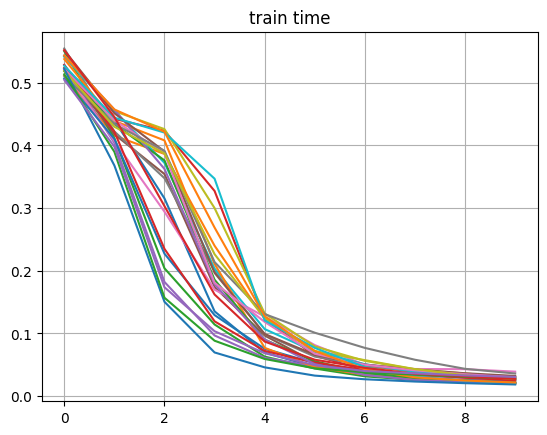

In [13]:

# for e in range(10):
path = f'scores/wavenet_vs_lstm/wavenet.npy'
scores = np.load(path)
for f,(train,val) in enumerate(rkf.split(range(10))):
    # print(val)
    tls = []
    vls = []
    for e in range(10):
        tl = scores[f,e,0]
        vl = scores[f,e,5]
        tls.append(np.mean(tl))
        vls.append(np.mean(vl))
    # print(f)
    plt.plot(range(10), tls, label='train')
    # plt.plot(range(10), vls, label='test')
plt.title(f'train time')
# plt.legend()
plt.grid()
# plt.savefig(f'plots/train_loss_gs_{layer}_{hidden_size}.png')
plt.draw()
plt.pause(0.05)

In [3]:
suspects = [2,3,5,11,12,14,15,16,18,19,21]
sus_folds = []
for i,(train,val) in enumerate(rkf.split(range(10))):
    print(val)
    if (i+1)%5 == 0:
        print()
#     if i in suspects:
#         sus_folds.append(val)

# print(sus_folds)

[6 7]
[3 8]
[4 5]
[0 9]
[1 2]

[4 9]
[7 8]
[1 3]
[0 6]
[2 5]

[2 3]
[0 9]
[4 8]
[1 7]
[5 6]

[2 5]
[3 6]
[1 7]
[4 8]
[0 9]

[8 9]
[4 5]
[0 2]
[1 6]
[3 7]



In [4]:
folds = 5
repeats = 5
seed = 22150

dry = get_clean_tensor()
crunch = get_crunch_tensor()

data_start = 0#sr.SINGLES_RING_OUT_START-8000
data_end = sr.SINGLES_RING_OUT_END

x = dry[data_start:data_end].view(folds * 2, -1)
y = crunch[data_start:data_end].view(folds * 2, -1)

In [5]:
import torchaudio
from utilities import plot_waveform

In [29]:
for s in sus_folds:
    y_val = y[s].flatten()
    torchaudio.save(f'temporary/{s}.wav',y_val.unsqueeze(0),44100)

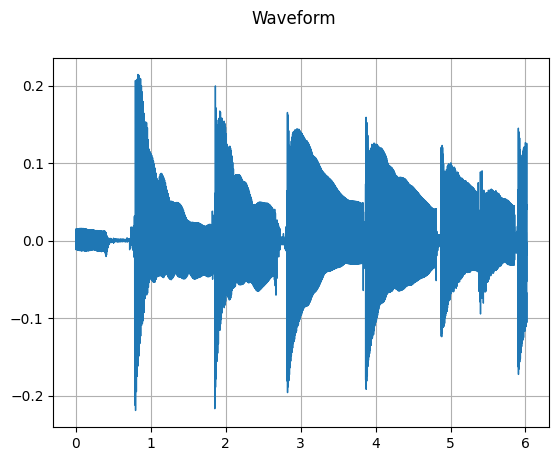

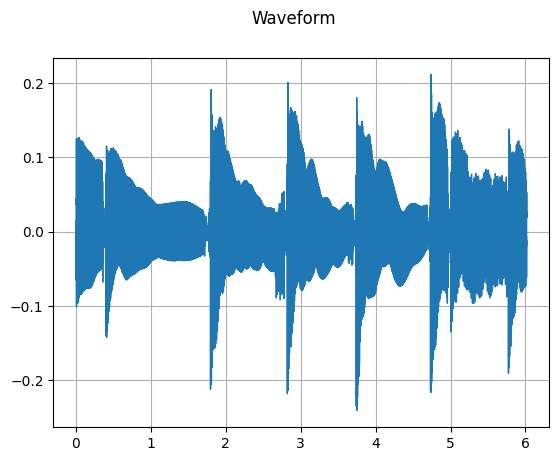

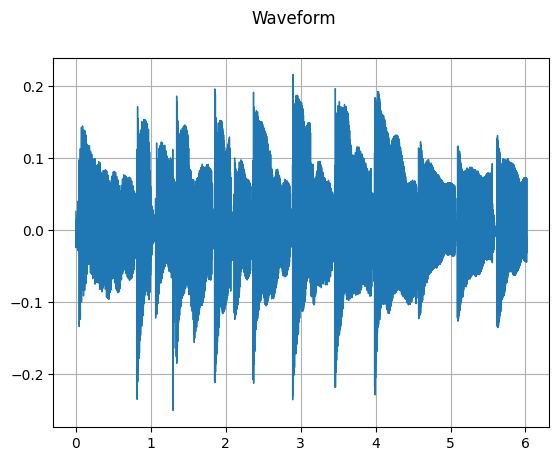

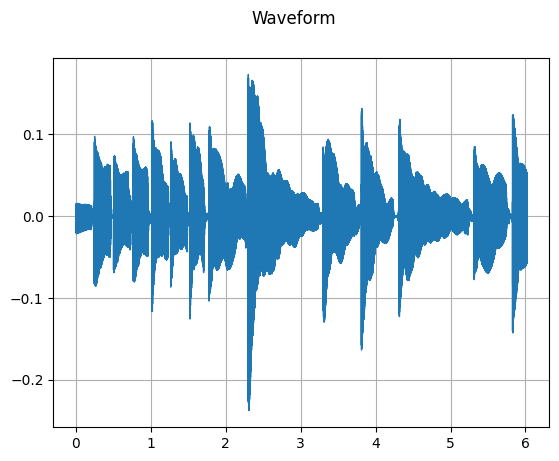

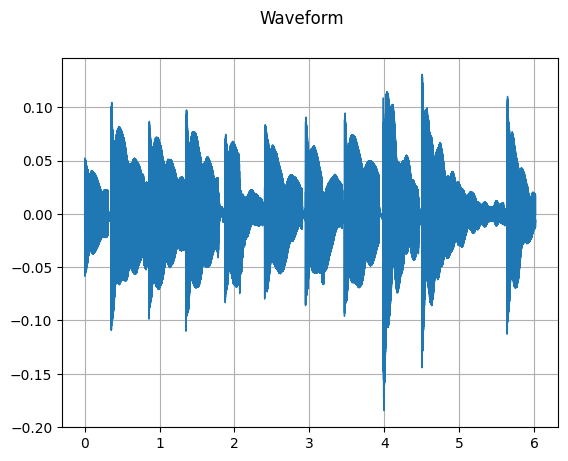

In [14]:
sus = [4,5,6,8,9]

for s in sus:
    sw = x[s].flatten().unsqueeze(0)
    plot_waveform(sw,44100,)
    torchaudio.save(f'temporary/{s}.wav',sw,44100)

In [6]:
xt = x.flatten()[:4144000].view(2000,-1)
xt[:,:2].flatten().shape

torch.Size([4000])

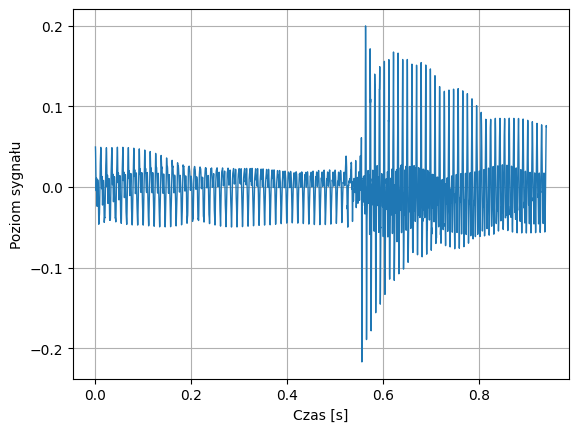

In [28]:
plot_waveform(xt[540:560,:].flatten().unsqueeze(0),44100,title='')

In [10]:
rerun_scores = np.load('temporary/test_rerun.npy')

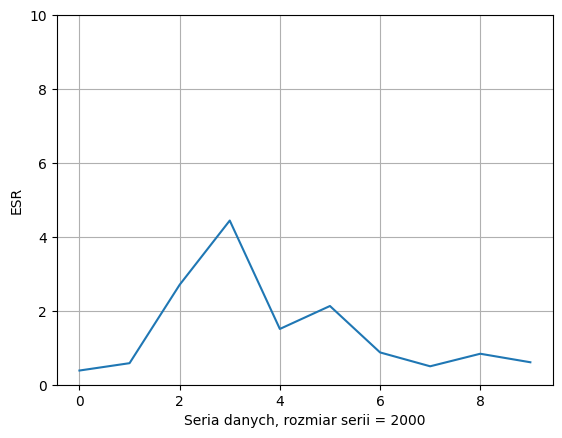

In [25]:
plt.plot(range(10),rerun_scores[540:550])
plt.grid()
plt.xlabel('Seria danych, rozmiar serii = 2000')
plt.ylabel('ESR')
plt.ylim(0,10)
plt.draw()